### 1. Problem Statement & Data Collection

### Objective : Loan Approval Prediction Using Decision Trees

#### Import necessary libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [80]:
data = pd.read_csv("loan_approval_dataset.csv")

#### Data Inspection

In [83]:
print(data.head())

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

### 2: Exploratory Data Analysis (EDA)

#### Display dataset info and summary

In [87]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None


In [89]:
print(data.describe(include='all'))

            loan_id   no_of_dependents  education  self_employed  \
count   4269.000000        4269.000000       4269           4269   
unique          NaN                NaN          2              2   
top             NaN                NaN   Graduate            Yes   
freq            NaN                NaN       2144           2150   
mean    2135.000000           2.498712        NaN            NaN   
std     1232.498479           1.695910        NaN            NaN   
min        1.000000           0.000000        NaN            NaN   
25%     1068.000000           1.000000        NaN            NaN   
50%     2135.000000           3.000000        NaN            NaN   
75%     3202.000000           4.000000        NaN            NaN   
max     4269.000000           5.000000        NaN            NaN   

         income_annum   loan_amount    loan_term   cibil_score  \
count    4.269000e+03  4.269000e+03  4269.000000   4269.000000   
unique            NaN           NaN          NaN   

#### Check how many unique values are there in the variables

In [92]:
print(data.nunique())

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64


#### Check if there is any duplicate value in the dataset

In [95]:
print(data.duplicated().sum())

0


#### Check if there is any missing value in the dataset

In [98]:
print(data.isnull().sum())

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


#### alue counts of target variable

In [110]:
print(data[' loan_status'].value_counts())

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


#### Visualizing distribution of loan status

C:\Users\shubh\AppData\Local\Temp\ipykernel_14692\2339623563.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' loan_status', data=data, palette='coolwarm')


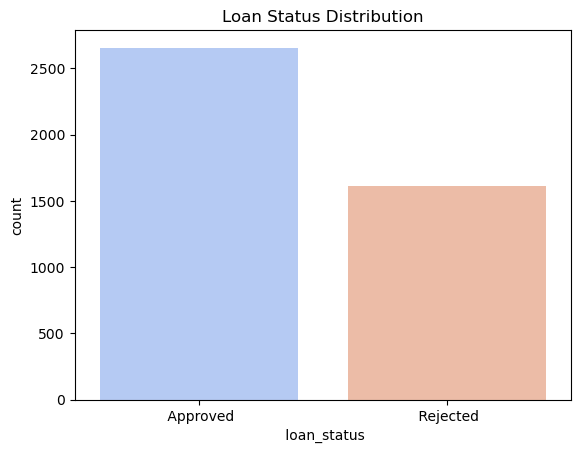

In [107]:
sns.countplot(x=' loan_status', data=data, palette='coolwarm')
plt.title('Loan Status Distribution')
plt.show()

### 3: Data Preprocessing

#### Handle missing values by filling with mode

In [ ]:
data.fillna(data.mode().iloc[0], inplace=True)

#### Encoding Categorical Variables

In [131]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric
categorical_cols = data.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical features
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

### 4: Splitting Data

In [137]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=[' loan_status'])
y = data[' loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 5: Building Decision Tree Model

#### Initialize and train logistic regression model¶

In [140]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

#### Predictions

In [144]:
y_pred = model.predict(X_test)

### 6: Model Evaluation

In [156]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score : {accuracy}')

print(f'Classification Report : {classification_report(y_test, y_pred)}')

Accuracy score : 0.9742388758782201
Classification Report :               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.96      0.97       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



### Final Insights & Conclusion

- The Decision Tree model provides a simple, interpretable way to predict loan approvals.

- The dataset's categorical variables were effectively converted for model training.

- The model's predictions help financial institutions in automating loan approvals.